In [18]:
##Task 1: Finding Corners and Interest Points
##Reference: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

#img = cv2.imread('graffiti_01.png')
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('graffiti_01.png')

# YOUR CODE HERE 
img = np.int16(img) 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

# END OF YOUR CODE
plt.subplot(121), plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg)
plt.title('Interest Points Image'), plt.xticks([]), plt.yticks([])
plt.show()


error: OpenCV(3.4.4) /io/opencv/modules/imgproc/src/color.hpp:257: error: (-2:Unspecified error) in function 'cv::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::Set<3, 4>; VDcn = cv::Set<1>; VDepth = cv::Set<0, 2, 5>; cv::SizePolicy sizePolicy = (cv::SizePolicy)2u; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 3 (CV_16S)


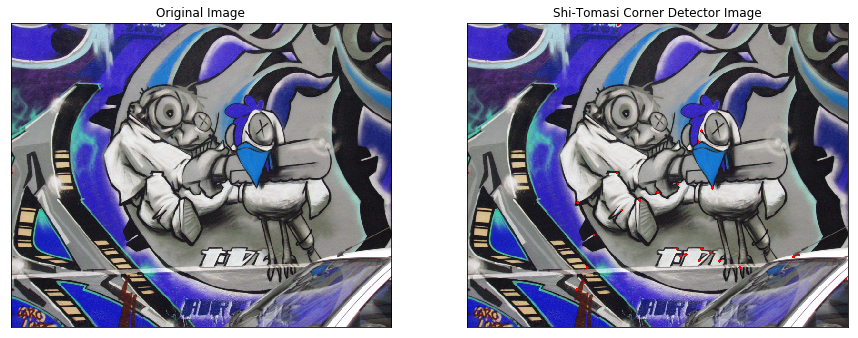

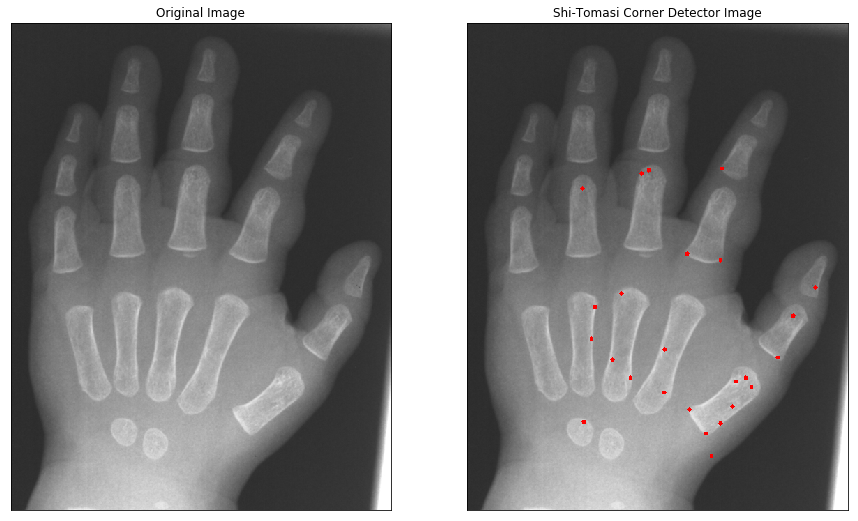

In [26]:
##Task 1:  Shi-Tomasi Corner Detector
##reference: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html

%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('graffiti_01.png')
img2 = cv2.imread('x-ray-hand-1.jpg')

# YOUR CODE HERE 

gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(cimg1,(x,y),3,255,-1)

    
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(cimg2,(x,y),3,255,-1)   
    
# END OF YOUR CODE
plt.subplot(121), plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg1)
plt.title('Shi-Tomasi Corner Detector Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121), plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg2)
plt.title('Shi-Tomasi Corner Detector Image'), plt.xticks([]), plt.yticks([])
plt.show()

#plt.imshow(img1)
#plt.imshow(img2)

In [ ]:
##Task 1: Corners with sub-pixel accuracy 沒跑出來
##reference: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('graffiti_01.png')
img2 = cv2.imread('x-ray-hand-1.jpg')

# YOUR CODE HERE 

gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
cimg1 = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(cimg1)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
cimg1[res[:,1],res[:,0]]=[0,0,255]
cimg1[res[:,3],res[:,2]] = [0,255,0] 


# END OF YOUR CODE
plt.subplot(121), plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg1)
plt.title('sub-pixel Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121), plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg2)
plt.title('sub-pixel Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [39]:
## Task 2: SIFT, SURF and FAST
##https://stackoverflow.com/questions/52305578/sift-cv2-xfeatures2d-sift-create-not-working-even-though-have-contrib-instal
##https://segmentfault.com/a/1190000015709719
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('graffiti_01.png')
img2 = cv2.imread('x-ray-hand-1.jpg')

# YOUR CODE HERE :SIFT
gray= cv2.cvtColor(img1,cv.COLOR_BGR2GRAY)
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.xfeatures2d.SIFT_create()

#sift=cv2.xfeatures2d_SIFT()
#sift=sift.create()
kp = sift.detect(gray,None)
kp=sift.detect(gray,None)
cv2.drawKeypoints(gray,kp,img1_sift)

# END OF YOUR CODE
plt.subplot(121), plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1_sift)
plt.title('SIFT Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121), plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_sift)
plt.title('SIFT Image'), plt.xticks([]), plt.yticks([])
plt.show()

#plt.imshow(img1_sift)
#plt.imshow(img1_surf)
#plt.imshow(img1_fast)
#plt.imshow(img2_sift)
#plt.imshow(img2_surf)
#plt.imshow(img2_fast)

error: OpenCV(3.4.4) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [52]:
# YOUR CODE HERE :SURF

%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('graffiti_01.png')
img2 = cv2.imread('x-ray-hand-1.jpg')

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
#surf = cv2.SURF(400)
surf = cv2.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img1,None)
len(kp)
img1_surf = cv2.drawKeypoints(img1,kp,None,(255,0,0),4)
# END OF YOUR CODE

plt.subplot(121), plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1_surf)
plt.title('SIFT Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121), plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_surf)
plt.title('SIFT Image'), plt.xticks([]), plt.yticks([])
plt.show()

AttributeError: module 'cv2.xfeatures2d' has no attribute 'SURF'

In [44]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img1 = cv.imread('graffiti_01.png')
img2 = cv.imread('x-ray-hand-1.jpg')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
kp_sift1 = sift.detect(gray1,None)
kp_sift2 = sift.detect(gray2,None)
img1_sift = cv.drawKeypoints(gray1,kp_sift1,img1)
img2_sift = cv.drawKeypoints(gray2,kp_sift2,img2)

surf = cv.xfeatures2d.SURF_create(10000)
kp_surf1, des1 = surf.detectAndCompute(gray1,None)
kp_surf2, des2 = surf.detectAndCompute(gray1,None)
img1_surf = cv.drawKeypoints(gray1,kp_surf1,img1)
img2_surf = cv.drawKeypoints(gray2,kp_surf2,img2)

fast = cv.FastFeatureDetector_create()
fast.setNonmaxSuppression(0)
kp_fast1 = fast.detect(gray1,None)
kp_fast2 = fast.detect(gray2,None)
img1_fast = cv.drawKeypoints(gray1,kp_fast1,img1)
img2_fast = cv.drawKeypoints(gray2,kp_fast2,img2)


# END OF YOUR CODE

plt.imshow(img1_sift)
plt.imshow(img1_surf)
plt.imshow(img1_fast)
plt.imshow(img2_sift)
plt.imshow(img2_surf)
plt.imshow(img2_fast)

error: OpenCV(3.4.4) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


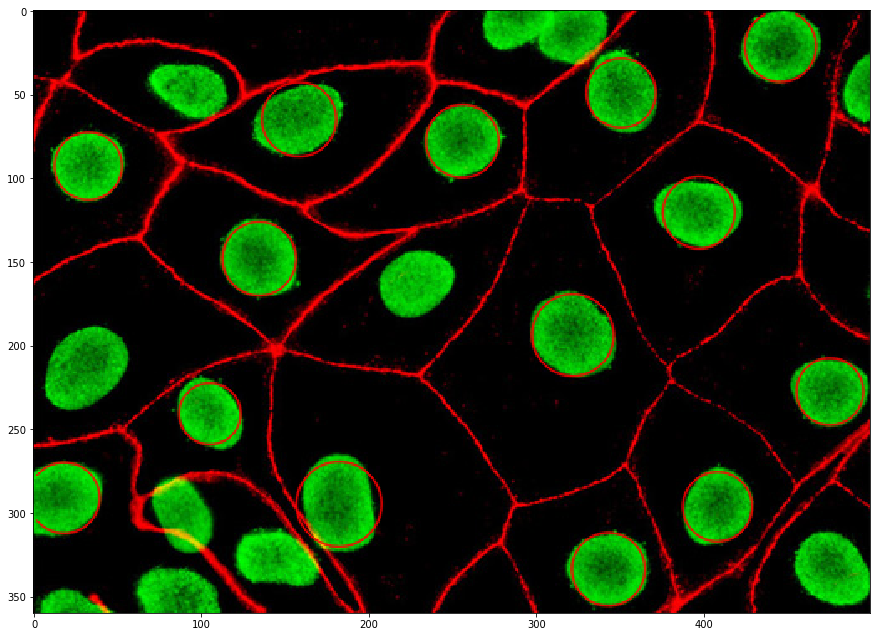

In [57]:
##Task 3: Blobs
##reference: https://stackoverflow.com/questions/8076889/how-to-use-opencv-simpleblobdetector
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
#img1 = cv2.imread('mdck0.jpg', cv2.IMREAD_GRAYSCALE)
#img2 = cv2.imread('mdck1.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('mdck0.jpg')
img2 = cv2.imread('mdck1.jpg')
# Set up the detector with default parameters.
#detector=cv2.SimpleBlobDetector()
detector=cv2.SimpleBlobDetector_create() 

##problem:
#https://stackoverflow.com/questions/48136978/how-to-use-feature2d-such-as-simpleblobdetector-correctly-python-opencv

# Detect blobs.
#keypoints = detector.detect(img1)
keypoints=detector.detect(img1)
keypoints2=detector.detect(img2)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
img1_with_keypoints = cv2.drawKeypoints(img1, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_keypoints = cv2.drawKeypoints(img2, keypoints2, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img1_with_keypoints = cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB)
img2_with_keypoints = cv2.cvtColor(img2_with_keypoints, cv2.COLOR_BGR2RGB)

# END OF YOUR CODE

plt.imshow(img1_with_keypoints)
plt.imshow(img2_with_keypoints)

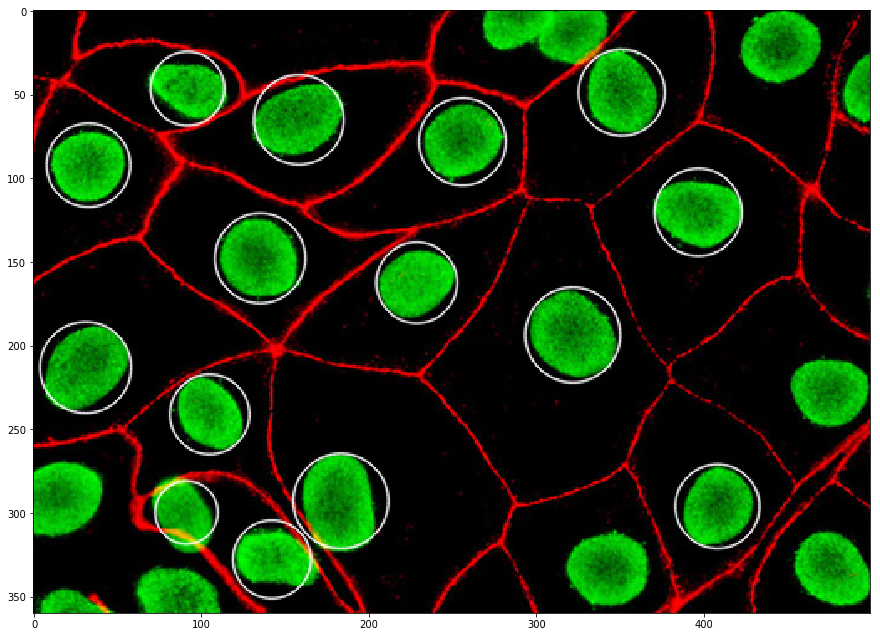

In [50]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 

img1 = cv.imread('mdck0.jpg')
img2 = cv.imread('mdck1.jpg')

smooth1 = cv.GaussianBlur(img1, (3, 3), 0)
smooth2 = cv.GaussianBlur(img2, (3, 3), 0)
hsv1 = cv.cvtColor(smooth1, cv.COLOR_BGR2HSV)
hsv2 = cv.cvtColor(smooth2, cv.COLOR_BGR2HSV)
    
# define range of purple color in HSV
purpleMin1 = (110,50,10)
purpleMax1 = (160, 255, 255)
purpleMin2 = (60,50,10)
purpleMax2 = (100, 255, 255)
    
# Sets pixels to white if in blue range, else will be set to black
mask1 = cv.inRange(hsv1, purpleMin1, purpleMax1)
mask1 = cv.dilate(mask1, None, iterations=1)
mask2 = cv.inRange(hsv2, purpleMin2, purpleMax2)
mask2 = cv.dilate(mask2, None, iterations=1)
    
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 30
     
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
     
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1
     
# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.2

detector = cv.SimpleBlobDetector_create(params)
reversemask1 = 255-mask1
keypoints = detector.detect(reversemask1)
img1 = cv.drawKeypoints(img1, keypoints,np.array([]), (0,255,0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

reversemask2 = 255-mask2
keypoints = detector.detect(reversemask2)
img2 = cv.drawKeypoints(img2, keypoints,np.array([]), (255,255,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# END OF YOUR CODE

plt.imshow(img1)
plt.imshow(img2)

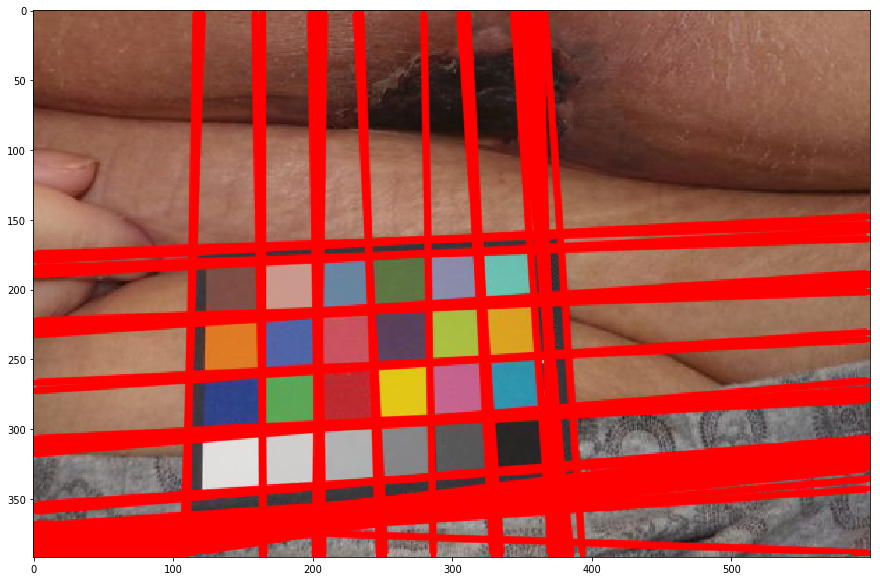

In [97]:
##Task 4: Hough Transform
##https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv.imread('color_wound.jpg')
   
# YOUR CODE HERE 

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,150,200,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,80,None,0,0) ###notice the setting here!!!

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# END OF YOUR CODE


plt.imshow(img)

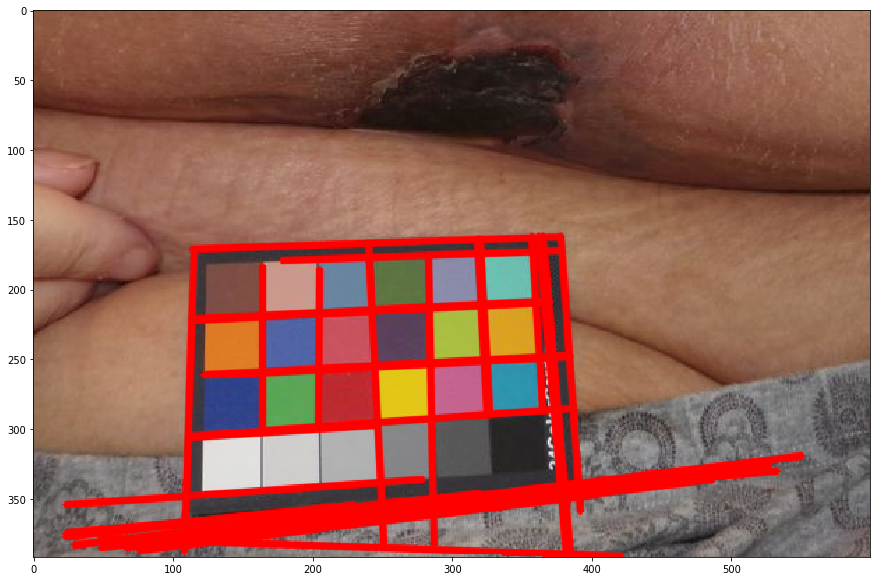

In [102]:
# Task 4: Hough Transform
%matplotlib inline
import numpy as np
import sys
import math
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('color_wound.jpg')

# YOUR CODE HERE 

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,200,apertureSize = 3)

lines = cv2.HoughLinesP(edges,1,np.pi/180,70, None, 100, 60)
#what means here?
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


img = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
# END OF YOUR CODE

plt.imshow(img)

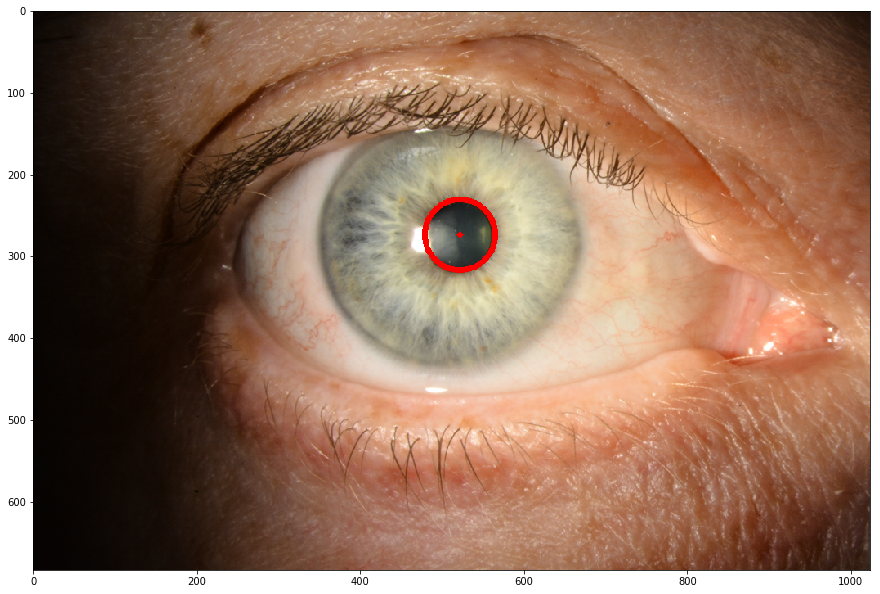

In [25]:
# Task 4: Hough Transform for Circles

%matplotlib inline
import numpy as np
import sys
import math
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
#img1 = cv2.imread('DH4_AF_CCD_B.jpg')
#img2 = cv2.imread('DH4_AF_CCD_B.jpg')
img_pupil = cv2.imread('pupil_detection.bmp')

# YOUR CODE HERE 

gray = cv2.cvtColor(img_pupil,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)
rows = gray.shape[0] ##important
circles = cv2.HoughCircles(gray ,cv2.HOUGH_GRADIENT,1, rows/8, param1=100,param2=30,minRadius=30,maxRadius=50)

circles = np.uint16(np.around(circles))
if circles is not None:
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img_pupil,(i[0],i[1]),i[2],(0,0,255),5) ##center = (i[0], i[1])
        # draw the center of the circle
        cv2.circle(img_pupil,(i[0],i[1]),2,(0,0,255),3) ##radius = i[2]

img_pupil= cv2.cvtColor(img_pupil, cv2.COLOR_BGR2RGB)
# END OF YOUR CODE

#plt.imshow(img1)
#plt.imshow(img2)
plt.imshow(img_pupil)


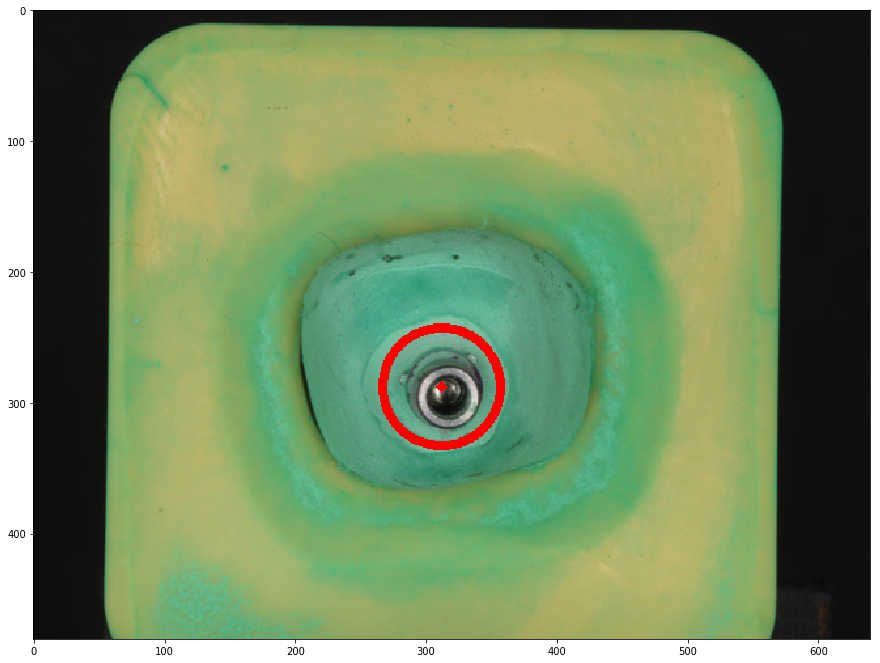

In [26]:
# Task 4: Hough Transform for Circles

%matplotlib inline
import numpy as np
import sys
import math
import cv2 
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('DH4_AF_CCD_B.jpg')
img2 = cv2.imread('DH4_AF_CCD_B.jpg')
#img_pupil = cv2.imread('pupil_detection.bmp')

# YOUR CODE HERE 

gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)
rows = gray.shape[0] ##important
circles = cv2.HoughCircles(gray ,cv2.HOUGH_GRADIENT,1, rows/8, param1=100,param2=30,minRadius=30,maxRadius=50)

circles = np.uint16(np.around(circles))
if circles is not None:
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img1,(i[0],i[1]),i[2],(0,0,255),5) ##center = (i[0], i[1])
        # draw the center of the circle
        cv2.circle(img1,(i[0],i[1]),2,(0,0,255),3) ##radius = i[2]

img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# END OF YOUR CODE

plt.imshow(img1)
#plt.imshow(img2)
#plt.imshow(img_pupil)


In [ ]:
#Bonus Programming Task: Own Implementation of the Hough Transform for Circles
